# Produisez une étude de marché avec Python
# Nettoyage et Analyse exploratoire des données

### Table des matières

* [1. Import, nettoyage et fusion des fichiers](#Import,_nettoyage,_et_fusion_des_fichiers)
* [2. Scalling : Centrage Réduction](#Scalling)
* [2. ACP](#ACP)
* [3. Cercle des Corrélations](#Cercle_des_correlations)
* [4. Projection](#Projection)

### Import, nettoyage et fusion des fichiers<a class="anchor" id="Import,_nettoyage,_et_fusion_des_fichiers"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
sns.set()

In [3]:
# J'importe le fichier CSV disponibilitealimentaire_2017

disponibilitealimentaire_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
disponibilitealimentaire_2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:
# Je conserve uniquement les produits "Viande de Volailles"

disponibilitealimentaire_2017 = disponibilitealimentaire_2017.loc[disponibilitealimentaire_2017['Produit'] == 'Viande de Volailles']
disponibilitealimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [5]:
# Je réalise un pivot pour n'avoir qu'une ligne par pays et une variable par élément

disponibilitealimentaire_2017_pivot = disponibilitealimentaire_2017.pivot_table(index = ['Zone'], columns = 'Élément', values = 'Valeur', aggfunc = 'sum')
disponibilitealimentaire_2017_pivot

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0


In [6]:
# J'importe le fichier population_2000_2018

population_2000_2018 = pd.read_csv('Population_2000_2018.csv')
population_2000_2018

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [7]:
# Je conserve uniquement l'année 2017

population_2017 = population_2000_2018.loc[population_2000_2018['Année'] == 2017]
population_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [8]:
# Je conserve uniquement les variables Zone et Valeur

population_2017 = population_2017.loc[:,['Zone','Valeur']]
population_2017

,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409
...,...,...
4333,Venezuela (République bolivarienne du),29402.484
4352,Viet Nam,94600.648
4371,Yémen,27834.819
4390,Zambie,16853.599


In [9]:
# J'importe le fichier FAOSTAT_PIB_2017

PIB_2017 = pd.read_excel('FAOSTAT_PIB_2017.xls')
PIB_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.696001,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44651.829102,X,Ciffre de sources internationales,NaN


In [10]:
# Je conserve uniquement les variables Zone et Valeur

PIB_2017 = PIB_2017.loc[:,['Zone','Valeur']]
PIB_2017

,Zone,Valeur
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102
...,...,...
206,Venezuela (République bolivarienne du),8432.288335
207,Viet Nam,2365.521494
208,Yémen,745.087677
209,Zambie,1534.874627


In [11]:
# Je renomme la variable valeur en PIB_par_habitant

PIB_2017.rename(columns = {'Valeur': 'PIB_par_habitant'}, inplace=True)
PIB_2017.head()

,Zone,PIB_par_habitant
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102


In [12]:
# J'importe le fichier Stabilité Politique

Stabilite_politique = pd.read_excel('StabilitePolitique.xlsx')
Stabilite_politique.head()

,Zone,Year,Stabilite_politique
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07


In [13]:
# Je garde uniquement l'année 2017

Stabilite_politique = Stabilite_politique.loc[Stabilite_politique['Year'] == 2017,:]

# Je supprime ensuite la colonne Year

Stabilite_politique.drop(['Year'], axis = 1, inplace = True)
Stabilite_politique.head()

,Zone,Stabilite_politique
16,Afghanistan,-2.80
36,Afrique du Sud,-0.28
56,Albanie,0.38
76,Algérie,-0.92
96,Allemagne,0.59


In [14]:
# Je fusionne les deux dataframes disponibilitealimentaire_2017_pivot et population_2017

df_inter = pd.merge(disponibilitealimentaire_2017_pivot, population_2017, on = ['Zone'], how = 'left', indicator=True)
df_inter.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Valeur,_merge
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,36296.113,both
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,57009.756,both
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,2884.169,both
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,41389.189,both
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658.409,both


In [15]:
# Je fusionne le dataframe obtenu avec le dataframe PIB_2017

df_inter2 = pd.merge(df_inter, PIB_2017, on = ['Zone'], how = 'left')
df_inter2.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Valeur,_merge,PIB_par_habitant
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,...,55.0,2.0,28.0,0.0,NaN,NaN,0.0,36296.113,both,520.616409
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,...,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,57009.756,both,6121.876572
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,...,47.0,NaN,13.0,0.0,NaN,NaN,4.0,2884.169,both,4514.204908
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,...,264.0,13.0,275.0,0.0,NaN,NaN,0.0,41389.189,both,4109.696001
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,...,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658.409,both,44651.829102


In [16]:
# Je fusionne le dataframe obtenu avec le dataframe Stabilite_politique

df = pd.merge(df_inter2, Stabilite_politique, on = ['Zone'], how = 'left')
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Valeur,_merge,PIB_par_habitant,Stabilite_politique
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,...,2.0,28.0,0.0,NaN,NaN,0.0,36296.113,both,520.616409,-2.80
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,...,83.0,1667.0,0.0,NaN,NaN,0.0,57009.756,both,6121.876572,-0.28
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,...,NaN,13.0,0.0,NaN,NaN,4.0,2884.169,both,4514.204908,0.38
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,...,13.0,275.0,0.0,NaN,NaN,0.0,41389.189,both,4109.696001,-0.92
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,...,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658.409,both,44651.829102,0.59


In [17]:
# Vérifions que la colonne _merge ne contient que des valeurs both

df._merge.value_counts()

both          172
left_only       0
right_only      0
Name: _merge, dtype: int64

In [18]:
# Je supprime l'index numérique pour le remplacer par les pays

df = df.set_index('Zone')
df

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Valeur,_merge,PIB_par_habitant,Stabilite_politique
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,...,2.0,28.0,0.0,NaN,NaN,0.0,36296.113,both,520.616409,-2.80
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,...,83.0,1667.0,0.0,NaN,NaN,0.0,57009.756,both,6121.876572,-0.28
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,...,NaN,13.0,0.0,NaN,NaN,4.0,2884.169,both,4514.204908,0.38
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,...,13.0,275.0,0.0,NaN,NaN,0.0,41389.189,both,4109.696001,-0.92
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,...,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658.409,both,44651.829102,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,...,NaN,48.0,0.0,NaN,NaN,-26.0,9487.203,both,40644.804043,0.62
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,...,17.0,340.0,0.0,NaN,NaN,-1.0,16785.361,both,6213.501276,-0.07
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,...,NaN,21914.0,0.0,NaN,77.0,80.0,325084.756,both,59921.674703,0.29


In [19]:
# Je renomme la variable Valeur par population et je raccourcis le nom de la variable 'Disponibilité alimentaire en quantité (kg/personne/an)'

df.rename(columns = {'Valeur': 'population'}, inplace=True)
df.rename(columns = {'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alim (kg/personne/an)'}, inplace=True)
df.head()

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Dispo alim (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population,_merge,PIB_par_habitant,Stabilite_politique
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,...,2.0,28.0,0.0,NaN,NaN,0.0,36296.113,both,520.616409,-2.80
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,...,83.0,1667.0,0.0,NaN,NaN,0.0,57009.756,both,6121.876572,-0.28
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,...,NaN,13.0,0.0,NaN,NaN,4.0,2884.169,both,4514.204908,0.38
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,...,13.0,275.0,0.0,NaN,NaN,0.0,41389.189,both,4109.696001,-0.92
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,...,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658.409,both,44651.829102,0.59


In [20]:
# Quelle est la taille de mon dataframe ?

df.shape

(172, 21)

In [21]:
# Quel est le % de valeurs manquantes par colonne ?

df.isna().mean()

Alimentation pour touristes                                      0.546512
Aliments pour animaux                                            0.994186
Autres utilisations (non alimentaire)                            0.802326
Disponibilité alimentaire (Kcal/personne/jour)                   0.000000
Dispo alim (kg/personne/an)                                      0.000000
Disponibilité de matière grasse en quantité (g/personne/jour)    0.000000
Disponibilité de protéines en quantité (g/personne/jour)         0.000000
Disponibilité intérieure                                         0.011628
Exportations - Quantité                                          0.215116
Importations - Quantité                                          0.011628
Nourriture                                                       0.011628
Pertes                                                           0.610465
Production                                                       0.023256
Résidus                               

In [22]:
# Je supprime les variables ne comportant pratiquement aucune valeur ou n'ayant pas d'intérêt pour l'analyse (la viande de volaille n'étant pas utilisée pour cela)
# Je supprime également les variables qui sont trop identiques (exemple : Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour)        

df = df.drop(columns = ['Aliments pour animaux','Alimentation pour touristes','Résidus','Variation de stock','Autres utilisations (non alimentaire)','Semences','Traitement','Pertes','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Nourriture','_merge'])
df

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
Zone,,,,,,,,
Afghanistan,1.53,57.0,NaN,29.0,28.0,36296.113,520.616409,-2.80
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009.756,6121.876572,-0.28
Albanie,16.36,47.0,0.0,38.0,13.0,2884.169,4514.204908,0.38
Algérie,6.38,277.0,0.0,2.0,275.0,41389.189,4109.696001,-0.92
Allemagne,19.47,1739.0,646.0,842.0,1514.0,82658.409,44651.829102,0.59
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,412.0,94.0,433.0,48.0,9487.203,40644.804043,0.62
Équateur,19.31,341.0,0.0,0.0,340.0,16785.361,6213.501276,-0.07
États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,21914.0,325084.756,59921.674703,0.29


In [23]:
# Nous allons remplacer les valeurs manquantes par la valeur moyenne de chaque colonne.

df = df.fillna(df.mean())
df.isna().mean()

Dispo alim (kg/personne/an)    0.0
Disponibilité intérieure       0.0
Exportations - Quantité        0.0
Importations - Quantité        0.0
Production                     0.0
population                     0.0
PIB_par_habitant               0.0
Stabilite_politique            0.0
dtype: float64

In [24]:
# Y a t-il des doublons ?

df.duplicated().sum()

0

In [25]:
# Combien y a t'il de valeurs différentes par colonne ?

df.nunique()

Dispo alim (kg/personne/an)    169
Disponibilité intérieure       136
Exportations - Quantité         51
Importations - Quantité         85
Production                     126
population                     172
PIB_par_habitant               172
Stabilite_politique            131
dtype: int64

In [26]:
df.describe()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000
mean,20.213372,687.594118,132.185185,89.529412,725.190476,4.284175e+04,14044.182114,-0.064201
std,15.860311,2174.356574,454.815536,185.575135,2472.027193,1.530637e+05,19349.341422,0.893050
min,0.130000,2.000000,0.000000,0.000000,0.000000,5.204500e+01,450.900697,-2.940000
25%,6.440000,31.500000,0.000000,3.000000,14.750000,2.874480e+03,2009.670178,-0.622500
50%,18.090000,105.000000,8.500000,16.000000,74.500000,9.757833e+03,6111.503500,-0.040000
75%,30.037500,376.500000,132.185185,85.250000,503.000000,3.013874e+04,16757.054056,0.650000
max,72.310000,18266.000000,4223.000000,1069.000000,21914.000000,1.421022e+06,111017.182246,1.600000


In [27]:
# Nous allons ensuite séparer nos données. D'un coté X la matrice des données de notre dataframe :

X = df.values
X[:5]

array([[ 1.53000000e+00,  5.70000000e+01,  1.32185185e+02,
         2.90000000e+01,  2.80000000e+01,  3.62961130e+04,
         5.20616409e+02, -2.80000000e+00],
       [ 3.56900000e+01,  2.11800000e+03,  6.30000000e+01,
         5.14000000e+02,  1.66700000e+03,  5.70097560e+04,
         6.12187657e+03, -2.80000000e-01],
       [ 1.63600000e+01,  4.70000000e+01,  0.00000000e+00,
         3.80000000e+01,  1.30000000e+01,  2.88416900e+03,
         4.51420491e+03,  3.80000000e-01],
       [ 6.38000000e+00,  2.77000000e+02,  0.00000000e+00,
         2.00000000e+00,  2.75000000e+02,  4.13891890e+04,
         4.10969600e+03, -9.20000000e-01],
       [ 1.94700000e+01,  1.73900000e+03,  6.46000000e+02,
         8.42000000e+02,  1.51400000e+03,  8.26584090e+04,
         4.46518291e+04,  5.90000000e-01]])

In [28]:
# C'est bien un np.array :

type(X)

numpy.ndarray

In [29]:
# Vérifions que la taille de notre matrice est conforme à nos attentes :

X.shape

(172, 8)

In [30]:
# Nous enregistrons les noms de pays dans une variable pays :

pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=172)

In [31]:
# et nos colonnes, nos utilisations, dans une variable utilisations :

utilisations = df.columns
utilisations

Index(['Dispo alim (kg/personne/an)', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité', 'Production',
       'population', 'PIB_par_habitant', 'Stabilite_politique'],
      dtype='object')

### SCALLING : Centrage Réduction<a class="anchor" id="Scalling"></a>

In [32]:
# Commençons par scaler les données. On instancie :

scaler = StandardScaler()

In [33]:
# On fit et on transforme (centrage réduction)

X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.18143472, -0.29086088,  0.        , -0.32712432, -0.28285533,
        -0.04288902, -0.70095671, -3.07237656],
       [ 0.97865768,  0.65977323, -0.15256116,  2.29400303,  0.38209909,
         0.09283303, -0.41063084, -0.24234795],
       [-0.24366627, -0.29547337, -0.29148329, -0.27848485, -0.28894094,
        -0.26181418, -0.49396007,  0.49885002],
       [-0.87474713, -0.18938611, -0.29148329, -0.47304275, -0.18264561,
        -0.00951765, -0.51492667, -0.96108537],
       [-0.0470068 ,  0.48495987,  1.1330198 ,  4.06664173,  0.32002586,
         0.26089076,  1.58646291,  0.73468574]])

In [34]:
# On espère avoir une moyenne à 0 et un écart type à 1 :

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### ACP<a class="anchor" id="ACP"></a>

In [35]:
# Nous allons travailler sur les 6 premieres composantes

n_components = 6

In [36]:
# On instancie notre ACP

pca = PCA(n_components=n_components)

In [37]:
# On l'entraine sur des données scalées

pca.fit(X_scaled)

PCA(n_components=6)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [38]:
pca.explained_variance_ratio_

array([0.39605048, 0.24830581, 0.11622749, 0.09278774, 0.07653617,
       0.04975338])

>Ici la 1ère composante capte 40% de la variance de nos données initiales, la 2ème 25% etc.

In [39]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([39.61, 24.83, 11.62,  9.28,  7.65,  4.98])

In [40]:
# Les 2 premières composantes captent donc 40+25 = 64% de la variance, les 3 premières 40+25+12 = 76% de la variance etc.

# Réalisons une somme cumulée avec la fonction cumsum :

scree_cum = scree.cumsum().round()
scree_cum

array([40., 64., 76., 85., 93., 98.])

In [41]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

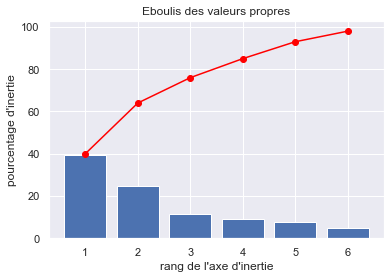

In [42]:
# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

>On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

>On voit ici que près de 75% de la variance est comprise dans les 3 premières composantes, pus de 90% dans les 5 premières

### COMPOSANTES<a class="anchor" id="Composantes"></a>

In [43]:
# Intéressons nous maintenant aux composantes. 
# La formule du calcul des composantes est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

pcs = pca.components_
pcs

array([[ 0.16811964,  0.5405285 ,  0.43402911,  0.19993602,  0.54320683,
         0.36454351,  0.14678159,  0.04121398],
       [-0.47991278,  0.12011535, -0.00784404, -0.19014049,  0.11223386,
         0.2738234 , -0.54295444, -0.58022916],
       [-0.20516137, -0.01880943, -0.37035068,  0.83735944, -0.13972642,
         0.28052747,  0.10670038, -0.09808387],
       [-0.19774386,  0.06120932, -0.43440511, -0.42459782,  0.0023245 ,
         0.61282357,  0.2195176 ,  0.40547942],
       [-0.76382588, -0.04965037,  0.34725435, -0.01194345,  0.02363499,
        -0.22064769,  0.49012763,  0.06251023],
       [ 0.25301383, -0.02019133, -0.14887868, -0.19722551, -0.03482819,
         0.07985409,  0.61923962, -0.69531731]])

In [44]:
# Affichons la même chose version Pandas

pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.168120,0.540528,0.434029,0.199936,0.543207,0.364544,0.146782,0.041214
1,-0.479913,0.120115,-0.007844,-0.190140,0.112234,0.273823,-0.542954,-0.580229
2,-0.205161,-0.018809,-0.370351,0.837359,-0.139726,0.280527,0.106700,-0.098084
3,-0.197744,0.061209,-0.434405,-0.424598,0.002325,0.612824,0.219518,0.405479
4,-0.763826,-0.049650,0.347254,-0.011943,0.023635,-0.220648,0.490128,0.062510
5,0.253014,-0.020191,-0.148879,-0.197226,-0.034828,0.079854,0.619240,-0.695317


In [45]:
# Maintenant réattribuons les noms des variables (utilisations) et nommons les composantes F1, F2 etc :

pcs.columns = utilisations
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
F1,0.17,0.54,0.43,0.20,0.54,0.36,0.15,0.04
F2,-0.48,0.12,-0.01,-0.19,0.11,0.27,-0.54,-0.58
F3,-0.21,-0.02,-0.37,0.84,-0.14,0.28,0.11,-0.10
F4,-0.20,0.06,-0.43,-0.42,0.00,0.61,0.22,0.41
F5,-0.76,-0.05,0.35,-0.01,0.02,-0.22,0.49,0.06
F6,0.25,-0.02,-0.15,-0.20,-0.03,0.08,0.62,-0.70


In [46]:
# Pivotons la table :

pcs.T

,F1,F2,F3,F4,F5,F6
Dispo alim (kg/personne/an),0.168120,-0.479913,-0.205161,-0.197744,-0.763826,0.253014
Disponibilité intérieure,0.540528,0.120115,-0.018809,0.061209,-0.049650,-0.020191
Exportations - Quantité,0.434029,-0.007844,-0.370351,-0.434405,0.347254,-0.148879
Importations - Quantité,0.199936,-0.190140,0.837359,-0.424598,-0.011943,-0.197226
Production,0.543207,0.112234,-0.139726,0.002325,0.023635,-0.034828
population,0.364544,0.273823,0.280527,0.612824,-0.220648,0.079854
PIB_par_habitant,0.146782,-0.542954,0.106700,0.219518,0.490128,0.619240
Stabilite_politique,0.041214,-0.580229,-0.098084,0.405479,0.062510,-0.695317


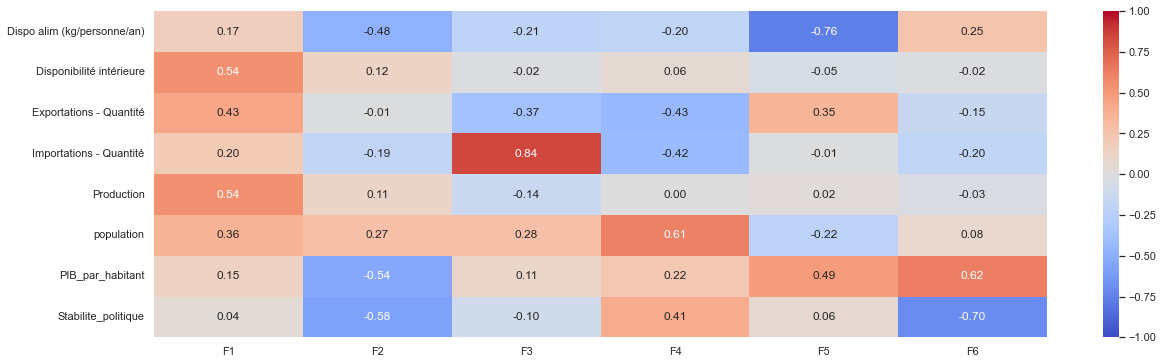

In [47]:
# Et pour une représentation plus visuelle, comme cela :

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

### CERCLE DES CORRELATIONS<a class="anchor" id="Cercle_des_correlations"></a>

In [48]:
# Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes (on commence à compter à partir de 0):

x, y = 0,1

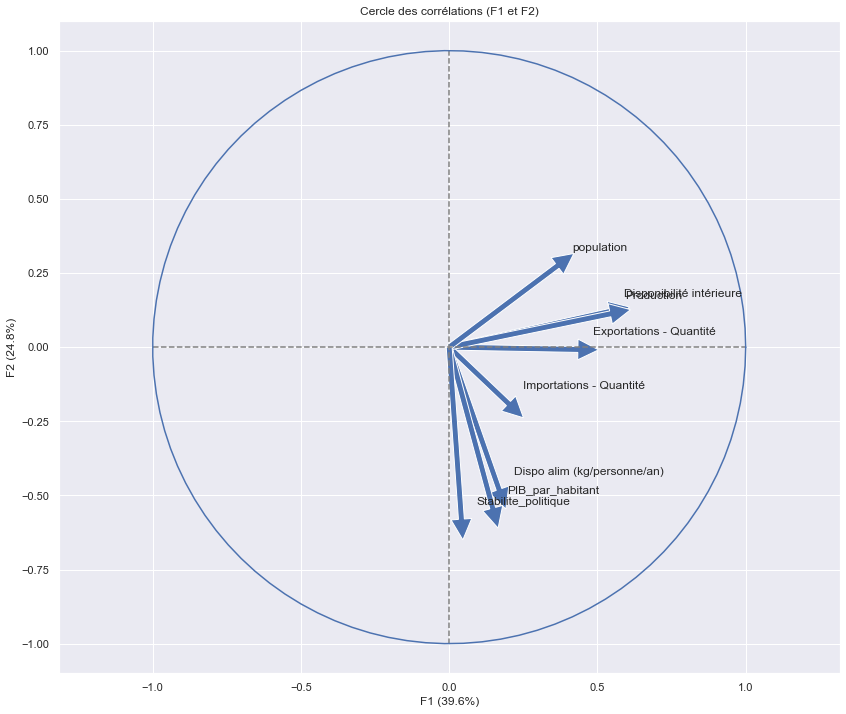

In [49]:
# Pour la partie graphique :

fig, ax = plt.subplots(figsize=(14, 12))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             utilisations[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

>On voit que les variables originelles corrélées à F1 sont les variables Production, exportations et disponibilité interieure.

>Les variables corrélées négativement à F2 sont les variables Stabilité politique, PIB par habitant et Disponibilité alimentaire.

In [50]:
# On peut en faire une fonction :

def correlation_graph(pca, 
                      x_y, 
                      utilisations) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(14, 12))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                utilisations[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [51]:
# Essayons cette fonction pour F2 et F3

x_y = (1,2)
x_y

(1, 2)

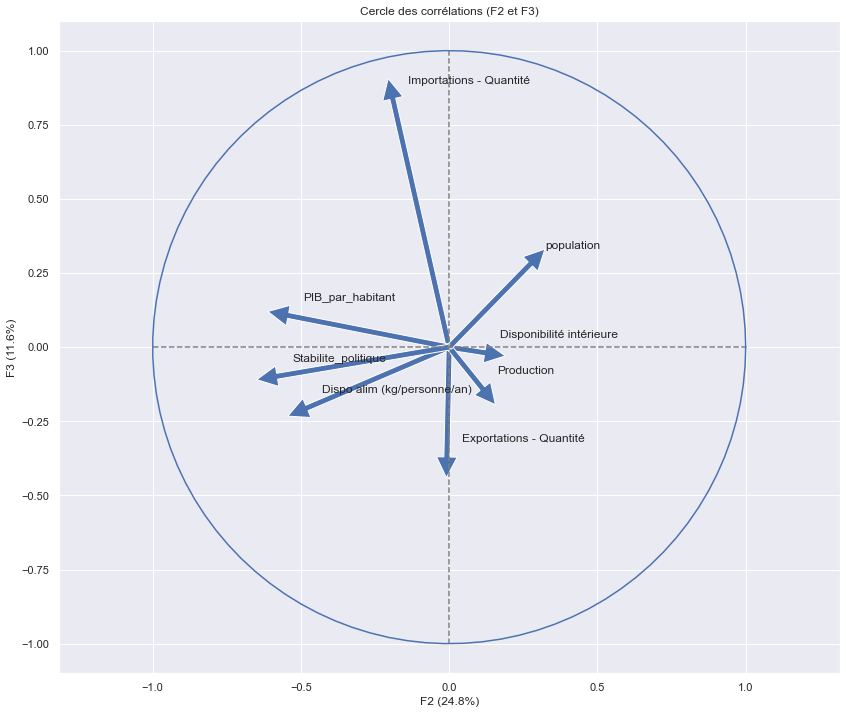

In [52]:
correlation_graph(pca, x_y, utilisations)

>La variable importations est corrélée positivement à F3 et la variable exportations est corrélée négativement.

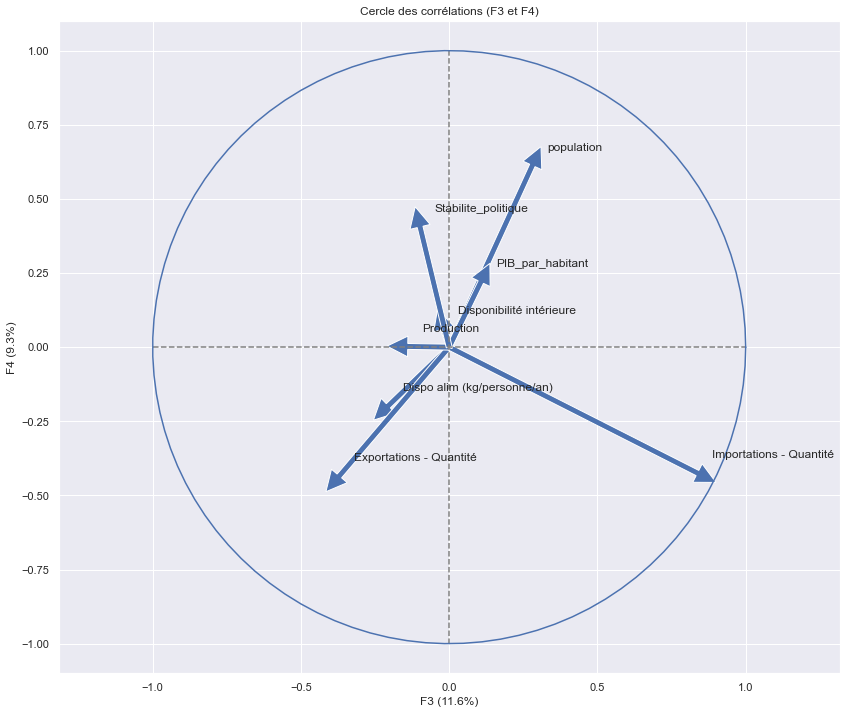

In [53]:
# Essayons pour F3 et F4

correlation_graph(pca, (2,3), utilisations)

>Enfin les variables corrélées à F4 sont les variables population et Stabilité Politique.

### PROJECTION<a class="anchor" id="Projection"></a>

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [54]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.82004119,  2.7140284 ,  0.2279841 , -1.07188437,  0.38792363,
         1.48011372],
       [ 1.08473501, -0.39353211,  1.71682236, -1.19152395, -1.08852112,
        -0.28709547],
       [-0.68721025,  0.011316  , -0.20440054,  0.20768661, -0.05708447,
        -0.62094732],
       [-0.68839713,  1.30341144, -0.04295466, -0.02013458,  0.26731427,
         0.27419007],
       [ 2.09115274, -1.88161786,  3.11183469, -1.37311703,  1.13019643,
        -0.51116509]])

In [55]:
# Et sous forme de Dataframe

data = pd.DataFrame(data = X_proj, index = pays, columns = ['F1','F2','F3','F4','F5','F6'])
data

,F1,F2,F3,F4,F5,F6
Zone,,,,,,
Afghanistan,-0.820041,2.714028,0.227984,-1.071884,0.387924,1.480114
Afrique du Sud,1.084735,-0.393532,1.716822,-1.191524,-1.088521,-0.287095
Albanie,-0.687210,0.011316,-0.204401,0.207687,-0.057084,-0.620947
Algérie,-0.688397,1.303411,-0.042955,-0.020135,0.267314,0.274190
Allemagne,2.091153,-1.881618,3.111835,-1.373117,1.130196,-0.511165
...,...,...,...,...,...,...
Émirats arabes unis,0.518248,-2.358449,1.335037,-0.570514,-0.402864,0.332731
Équateur,-0.526240,0.262363,-0.351207,0.136846,-0.209233,-0.127402
États-Unis d'Amérique,13.912117,-0.249084,-3.835985,-1.597401,1.593584,0.243591


In [56]:
# Rappelons que :

x_y

(1, 2)

In [57]:
# Voici la fonction 

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

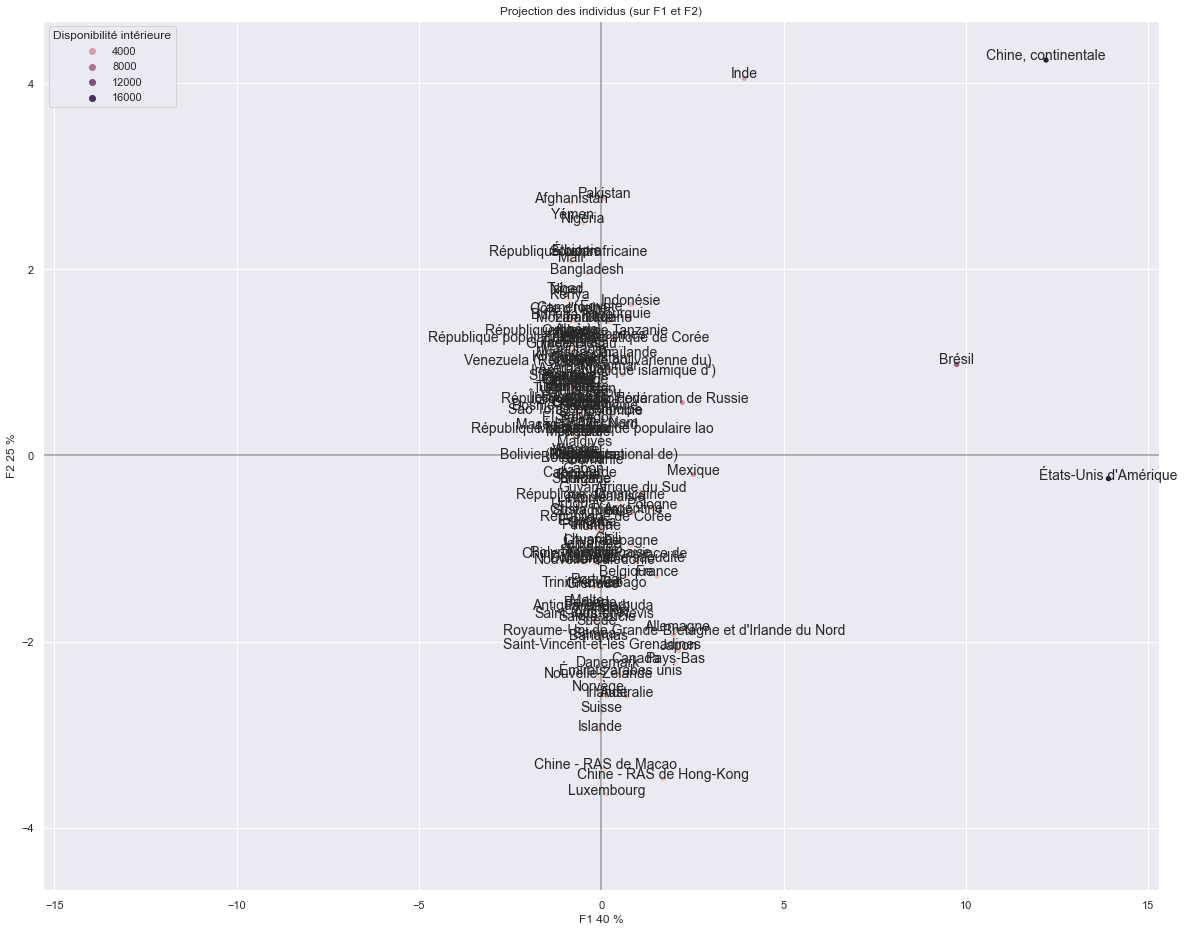

In [58]:
# Regardons ce que cela donne avec F1 et F2 :

x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=df['Disponibilité intérieure'], marker="o")

>Nous voyons donc que les USA et le Brésil sont corrélés positivement à F1. Ils suivement donc les caractéristiques de F1. On peut donc en déduire que ce sont des pays producteurs, exportateurs et dotés d'une bonne disponibilité intérieure. 

>Pour le négatif de F2, on trouve le Luxembourg, Hong-Kong, Macao, l'Islande, la Suisse, le Danemark, l'Australie, le Canada... donc des pays doté d'un bon PIB par habitant, ayant une bonne stabilité politique et une bonne disponibilité alimentaire.

>On trouve donc l'inverse pour le positif de F2, des pays pauvres, ayant une situation politique instable et une faible disponibilité alimentaire : l'Afghanistan, le Pakistan, le Yemen, le Bengladesh, le Nigeria...

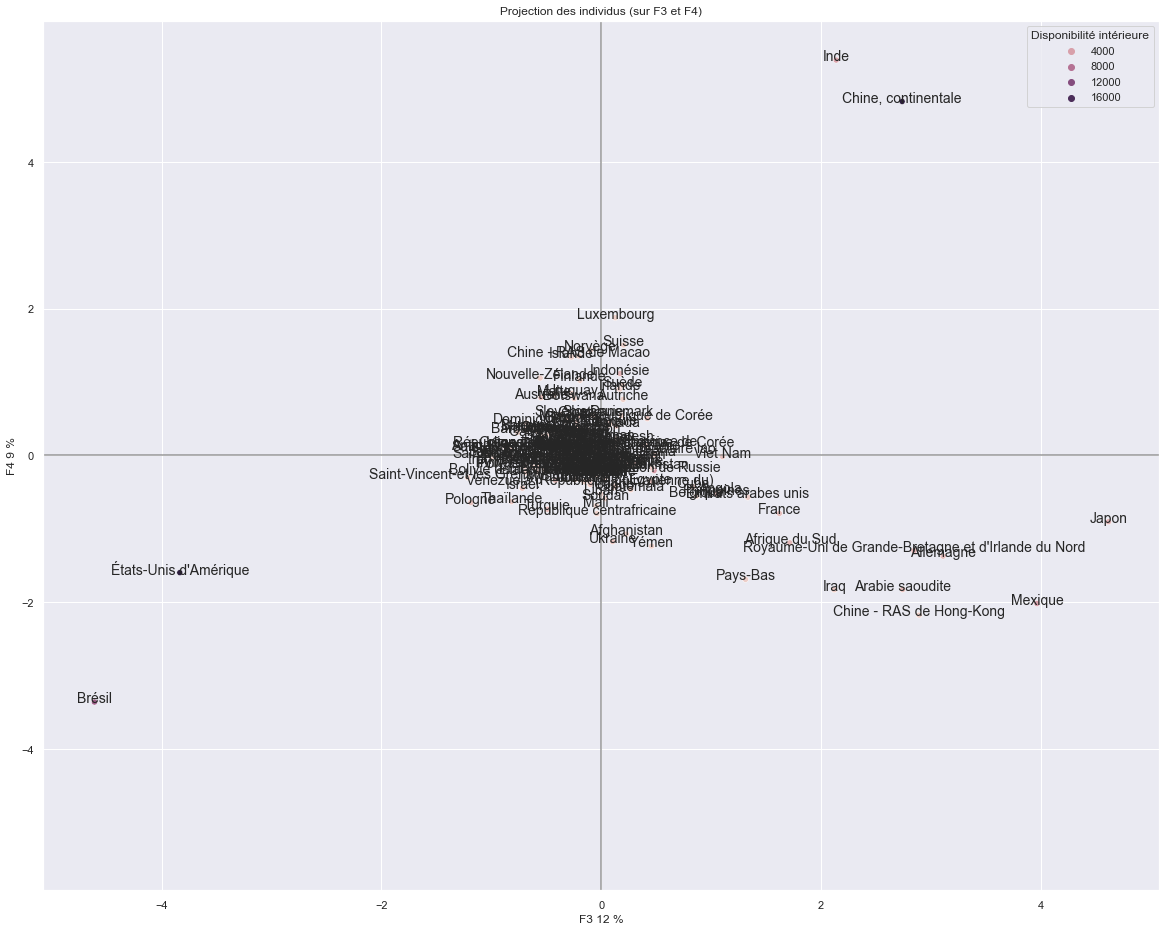

In [59]:
# Essayons avec F3 et F4 :

x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16), clusters=df['Disponibilité intérieure'],marker="o")

>Sur F3, on trouve les pays importateurs : le Japon, le Mexique, le Royaume uni, l'arabie saoudite. 

>Sur F4, les pays très peuplés : L'inde et la Chine

In [60]:
# Je convertis mon fichier df au format CSV pour pouvoir l'exporter

df.to_csv('df.csv')